Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
#leer conjunto de datos
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("./datos/adult.data",names=columnas, na_values=['?'] )
display(data.head(5))
len(data)

,edad,clase_de_trabajo,cantidad_personas,educacion,anios_de_estudio,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_de_capital,horas_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


32561

Prepare el conjunto de datoselimine los valores incompletos para este conjunto de datos		 y transforme las variables categóricas a dummies. 

In [3]:
# valores faltantes por columna
display(data.isnull().sum())
#eliminar datos faltantes
data=data.dropna(axis = 0)
len(data)

edad                     0
clase_de_trabajo      1836
cantidad_personas        0
educacion                0
anios_de_estudio         0
estado_civil             0
ocupacion             1843
relaciones               0
raza                     0
sexo                     0
ganancia_capital         0
perdida_de_capital       0
horas_por_semana         0
pais                   583
ganancia                 0
dtype: int64

30162

In [4]:
data_complete=data.drop(labels=['cantidad_personas'] , axis=1)
display(data.describe())
display(data.corr())
display(data.dtypes)
#explore data 
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k =  len(data[data['ganancia'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['ganancia'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k*100)/n_records,2)
print("total:",str(n_records))
print(">50k:",n_greater_50k)
print("<=50k:",n_at_most_50k)

,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
edad,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
cantidad_personas,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
anios_de_estudio,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
ganancia_capital,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
perdida_de_capital,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
horas_por_semana,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


edad                   int64
clase_de_trabajo      object
cantidad_personas      int64
educacion             object
anios_de_estudio       int64
estado_civil          object
ocupacion             object
relaciones            object
raza                  object
sexo                  object
ganancia_capital       int64
perdida_de_capital     int64
horas_por_semana       int64
pais                  object
ganancia              object
dtype: object

total: 30162
>50k: 7508
<=50k: 22654


In [5]:
# Split the data into features and target label
Y = data['ganancia']
X = data.drop(labels=['ganancia'],axis=1)

columnas=list(data.columns)
tipos=list(data.dtypes)


def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)
            
            
X_dummies=function_dummies(X)
display(X_dummies.head(5))
# TODO: Encode the 'income_raw' data to numerical values
Y = Y.str.replace('<=50K','0')
Y = Y.replace('>50K','1')


,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


1.1.1 Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó). Indique que cantidad de casos quedaron para cada ambiente.

In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


print(">50k train",y_train[y_train=='1'].count())
print("<50 train",y_train[y_train=='0'].count())

print(">50k test",y_test[y_test=='1'].count())
print("<50 test",y_test[y_test=='0'].count())


Training set has 21113 samples.
Testing set has 9049 samples.
>50k train 5223
<50 train 15890
>50k test 2285
<50 test 6764


1.1.2 Ajuste el mejor modelo posible . Indique el modelo con todas sus variables.

In [7]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=1000,
                                            min_samples_leaf=500,
                                            max_depth = 4
                                           )
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

d:\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


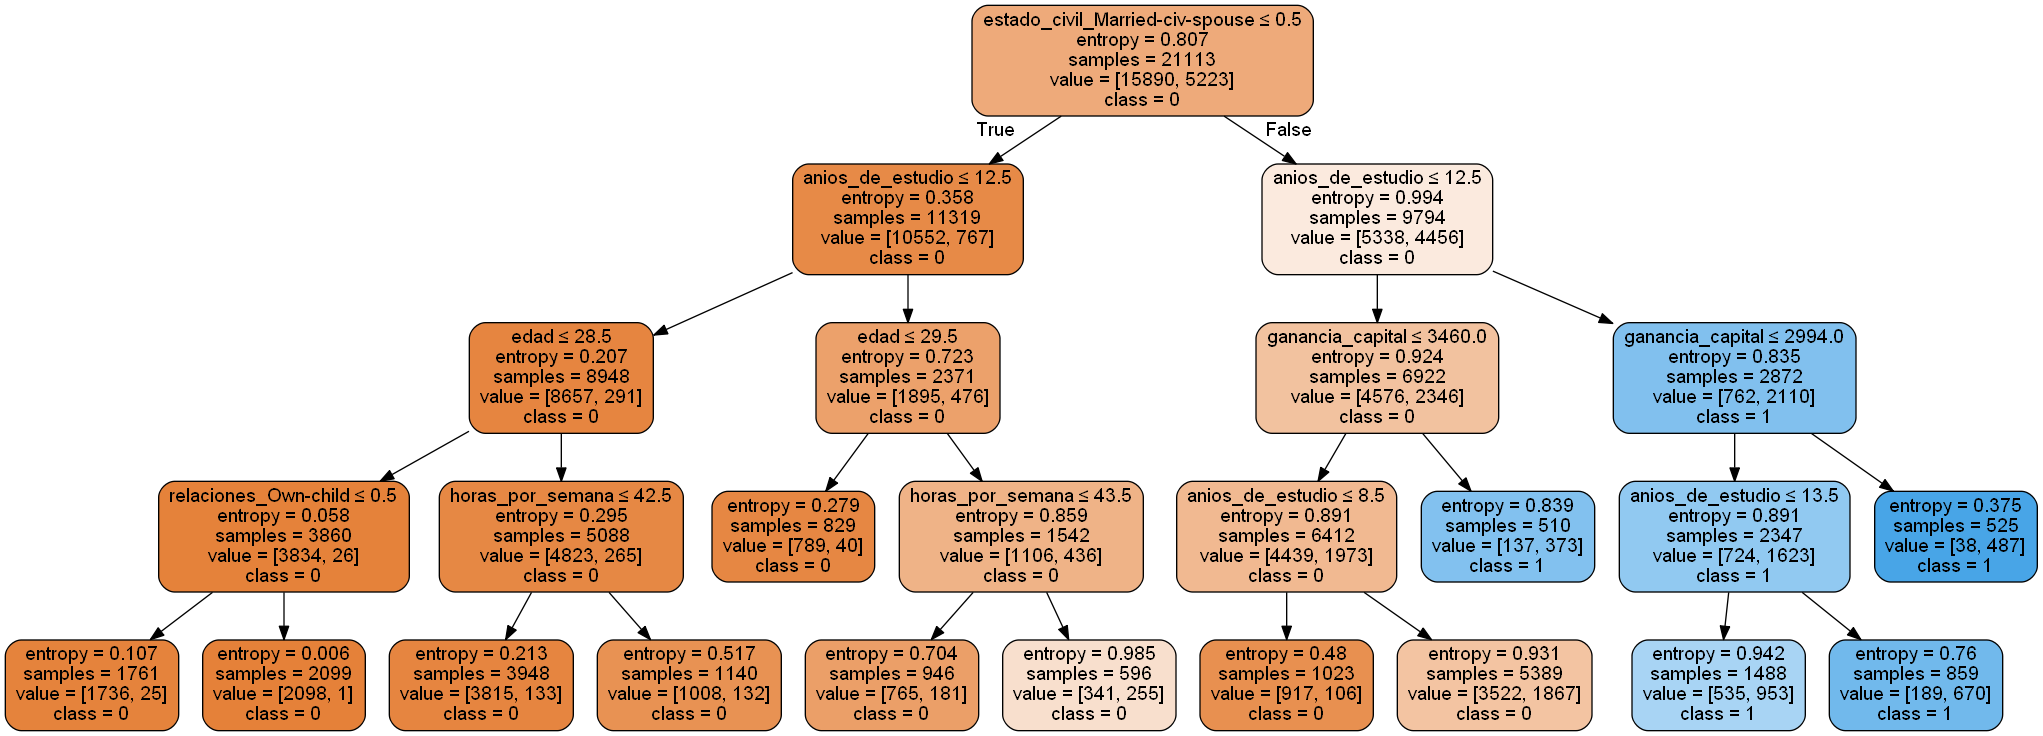

In [8]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

Calcular  la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación indicando también el total de casos de cada una de las clases.

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

'Test:'

array([[6351,  413],
       [1172, 1113]], dtype=int64)

'Train:'

array([[14991,   899],
       [ 2740,  2483]], dtype=int64)

accuracy test: 0.824842524035805
accuracy train: 0.82764173731824
verdaderos positivos: 1113
verdaderos negativos: 6351
falsos positivos: 413
falsos negativos: 1172
Normalized confusion matrix
[[0.93894145 0.06105855]
 [0.51291028 0.48708972]]


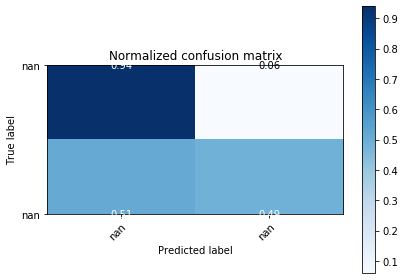

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score

#Predict the response for test dataset
y_pred_test = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

#n_samples / (n_classes * np.bincount(y))

display('Test:',confusion_matrix(y_test, y_pred_test))
display('Train:',confusion_matrix(y_train, y_pred_train))


print("accuracy test:",accuracy_score(y_test, y_pred_test))
print("accuracy train:",accuracy_score(y_train, y_pred_train))



tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

ac=(tp+tn)/(tn+ fp+ fn+ tp)

# Pretty display for notebooks
%matplotlib inline
#plot_confusion_matrix(y_test, y_pred_test, Y)

    

#plot_confusion_matrix(y_train, y_pred_train, Y)


plot_confusion_matrix(y_test, y_pred_test, Y,
                      normalize=True,
                      title='Normalized confusion matrix')

AUC test: 0.86


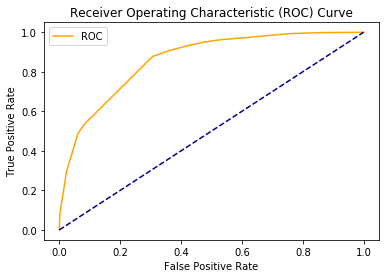

,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
2135,44,81853,9,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0.033688,0.966312,0
15639,21,306114,10,0,0,20,0,0,1,0,...,0,0,0,1,0,0,0,0.000476,0.999524,0
29059,36,186110,10,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
27523,30,45427,11,0,0,49,0,0,0,0,...,0,0,0,1,0,0,0,0.115789,0.884211,0
9280,42,133584,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0.346446,0.653554,0
21598,24,291407,9,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
28780,21,193130,10,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0.014196,0.985804,0
13383,32,195447,13,0,0,45,0,0,0,1,...,0,0,0,1,0,0,1,0.640457,0.359543,0
11015,35,143058,9,0,0,60,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,1
3180,30,326104,9,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0.346446,0.653554,1


In [11]:
#AUC curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    
probs_test = decision_tree.predict_proba(X_test)    

data_set_test=X_test.copy()
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test

auc_test = roc_auc_score(y_test, data_set_test['predicho_prob_1'])
print('AUC test: %.2f' % auc_test)


y_true='1' <= y_test

fpr, tpr, thresholds = roc_curve(y_true, data_set_test['predicho_prob_1'])

plot_roc_curve(fpr, tpr)
display(data_set_test.head(10))

AUC train: 0.87


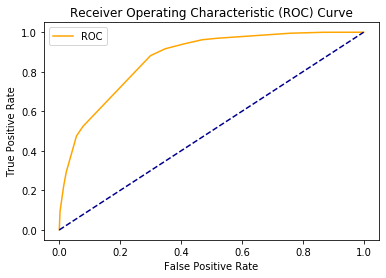

,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
15977,44,222978,9,0,1504,40,0,0,1,0,...,0,0,0,1,0,0,0,0.033688,0.966312,0
13574,32,83253,10,0,0,60,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
23210,30,327825,9,0,0,32,0,1,0,0,...,0,0,0,1,0,0,0,0.033688,0.966312,0
9284,23,109952,10,0,0,60,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
8841,54,204325,10,0,0,52,0,1,0,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
7734,21,70261,10,0,0,30,0,0,1,0,...,0,0,0,1,0,0,0,0.000476,0.999524,0
473,30,303990,9,0,0,60,0,0,1,0,...,0,0,0,1,0,0,0,0.115789,0.884211,0
5923,42,110028,9,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
7095,37,24106,9,0,0,30,0,0,0,0,...,0,0,0,1,0,0,0,0.346446,0.653554,0
9689,56,125147,6,0,0,60,0,0,0,0,...,0,0,0,1,0,0,0,0.103617,0.896383,0


In [12]:
probs_train = decision_tree.predict_proba(X_train)    

data_set_train=X_train.copy()
data_set_train['predicho']=y_pred_train
data_set_train['predicho_prob_1']=probs_train[:,1]
data_set_train['predicho_prob_0']=probs_train[:,0]
data_set_train['real']=y_train

auc_train = roc_auc_score(y_train, data_set_train['predicho_prob_1'])
print('AUC train: %.2f' % auc_train)


y_true='1' <= y_train

fpr, tpr, thresholds = roc_curve(y_true, data_set_train['predicho_prob_1'])

plot_roc_curve(fpr, tpr)
display(data_set_train.head(10))

1.1.4 Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. Entregue los resultados indicados:
Al azar e indique la cantidad de individuos que cobran más de 50.000 dólares.
Utilizando el modelo desarrollado e indique la cantidad de individuos que cobran más de 50.000 dólares.

In [13]:
X_test_75, X_test_25, y_test_75, y_test_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

#cantidad de individuos >50k al azar
print ("total 25%",y_test_25.count())
print(">50k test 25% azar",y_test_25[y_test_25=='1'].count())

##cantidad de individuos >50k modelo
y_test_modelo=data_set_test.sort(['predicho_prob_1'], ascending=[False])[1:y_test_25.count()]
print(">50k test 25% modelo",len(y_test_modelo[y_test_modelo['real'] == '1']))
#data_set_test.sort_values(by='predicho_prob_1', ascending=False)

total 25% 2263
>50k test 25% azar 548


AttributeError: 'DataFrame' object has no attribute 'sort'